In [1]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

2022-04-29 11:10:53.964169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 11:10:53.964187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [13]:
random.seed(1)
cards = pd.read_csv("./creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
scaler = StandardScaler()
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 

x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [4]:
frac

0.018222222222222223

In [6]:
#reduccion={'pca':{'finalDim':[2,4,6]},
#           'encoder':{'capas':[[512,128]], 'finalDim':[2,4,6], 'batch_size':16, 'epochs':20 }}
reduccion={'encoder':{'capas':[[512,128]], 'finalDim':[2,4,8], 'batch_size':4, 'epochs':50 }}

In [7]:
#modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
#          'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':0.15, 'epochs':100}}
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
           'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':[0.15,0.12,0.101], 'epochs':100},
           'dbscan':{'eps':0.5,'min_samples':[8,14,20]}}

In [14]:
# seed
#    999
#    888

#rn.set_seed(888)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

Epoch 1/50
6873/6873 [==============================] - 13s 2ms/step - loss: 0.9484 - val_loss: 0.9369
Epoch 2/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9390 - val_loss: 0.9363
Epoch 3/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9366 - val_loss: 0.9336
Epoch 4/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9360 - val_loss: 0.9373
Epoch 5/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9407 - val_loss: 0.9465
Epoch 6/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9391 - val_loss: 0.9357
Epoch 7/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9384 - val_loss: 0.9377
Epoch 8/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9363 - val_loss: 0.9426
Epoch 9/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9436 - val_loss: 0.9546
Epoch 10/50
6873/6873 [==============================] - 12s 2ms/step - l

Epoch 30/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9010 - val_loss: 0.8975
Epoch 31/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8991 - val_loss: 0.9007
Epoch 32/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8976 - val_loss: 0.8965
Epoch 33/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8983 - val_loss: 0.9017
Epoch 34/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8991 - val_loss: 0.9012
Epoch 35/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8994 - val_loss: 0.8965
Epoch 36/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.9000 - val_loss: 0.8952
Epoch 37/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8970 - val_loss: 0.8955
Epoch 38/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8987 - val_loss: 0.9007
Epoch 39/50
6873/6873 [==============================] - 12s 2ms

In [15]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

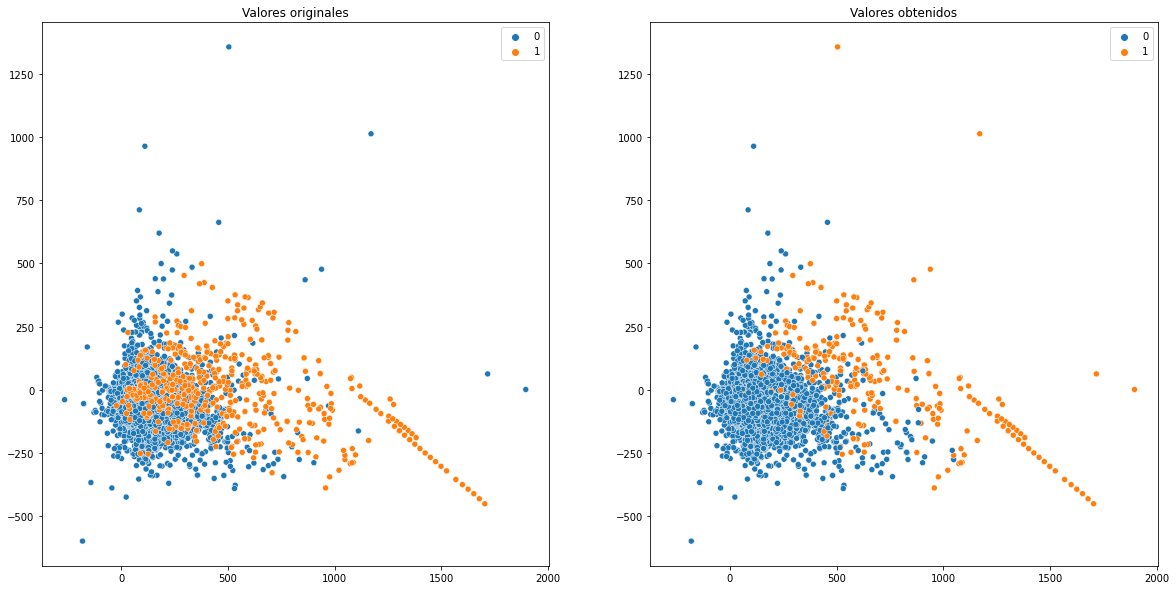

1
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

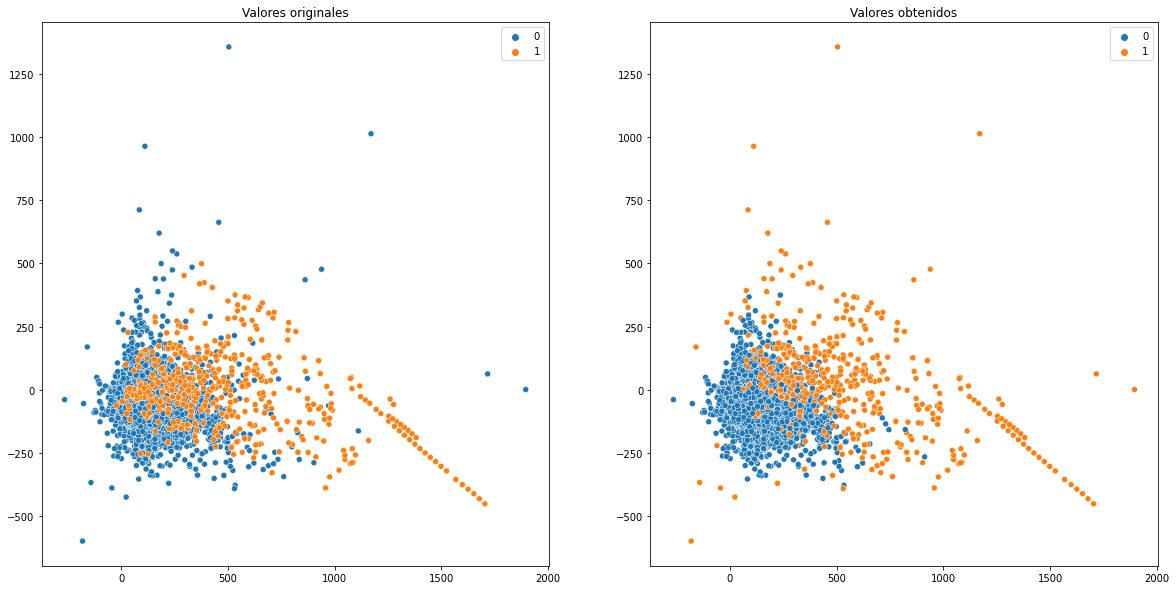

2
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

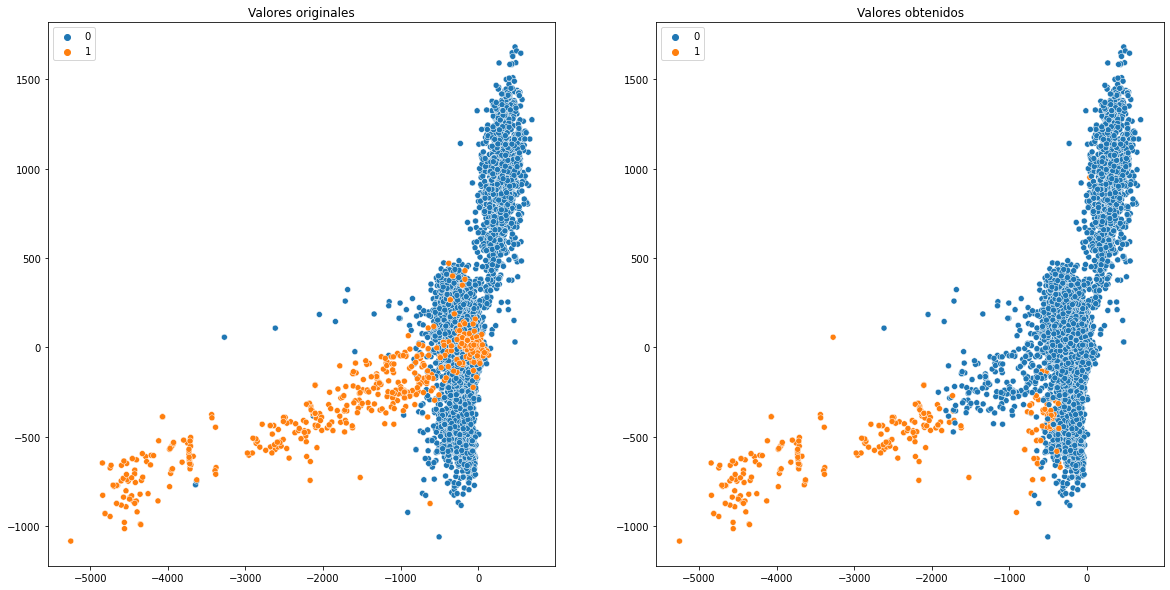

3
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

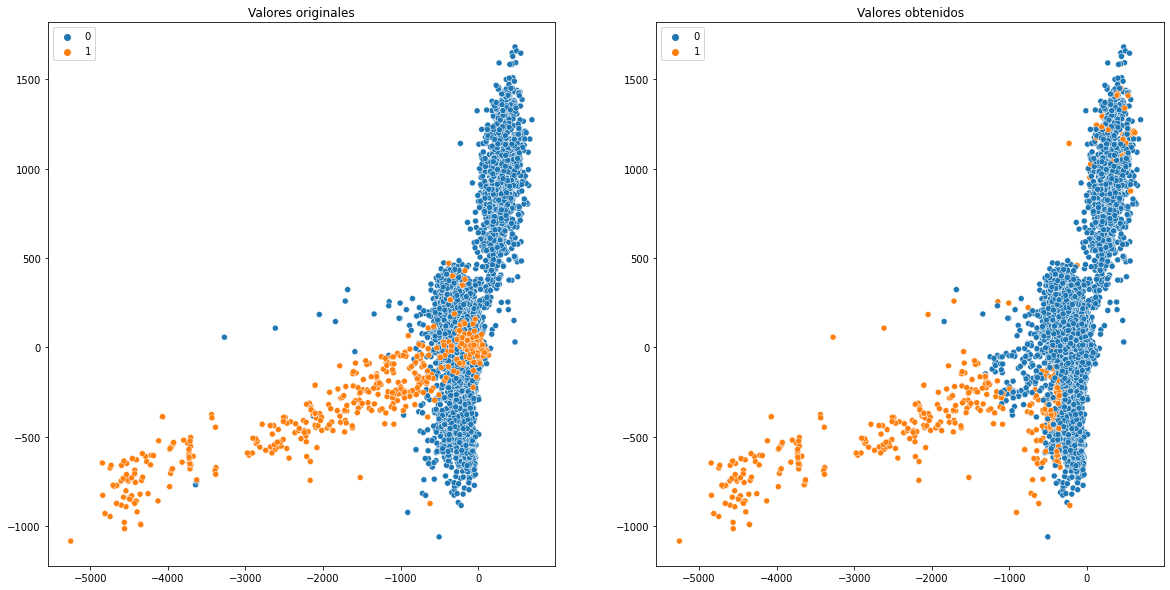

4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

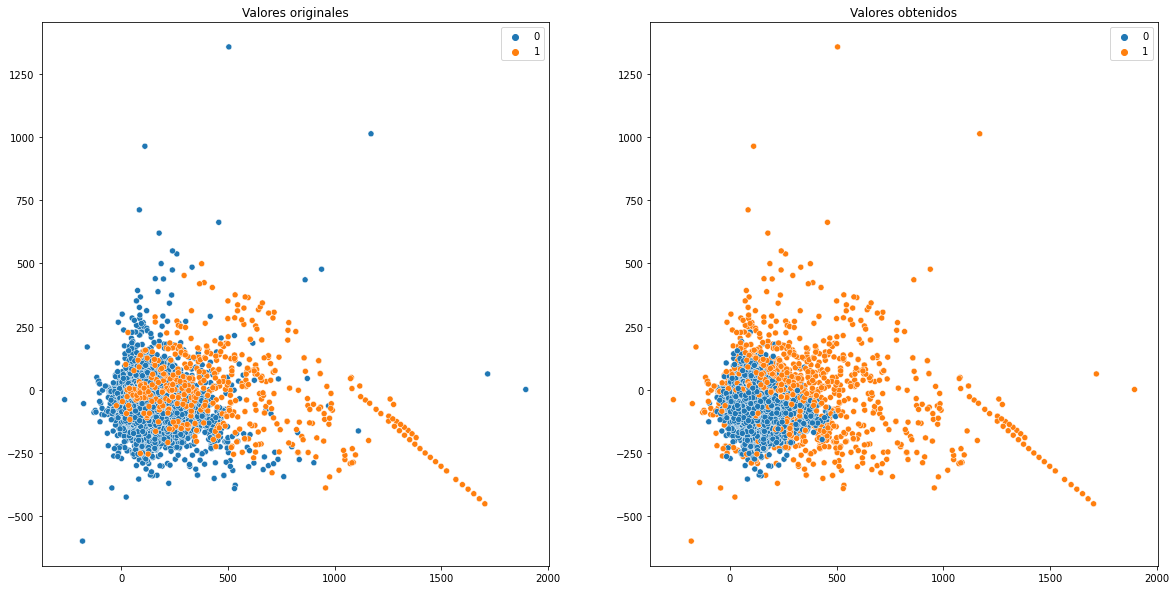

5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

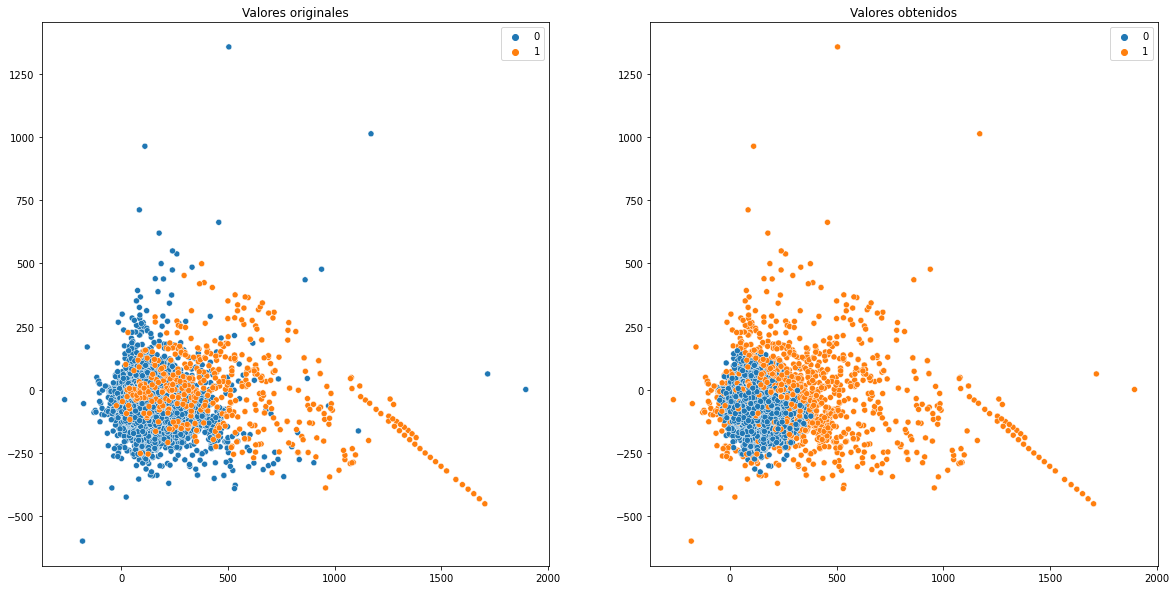

6
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

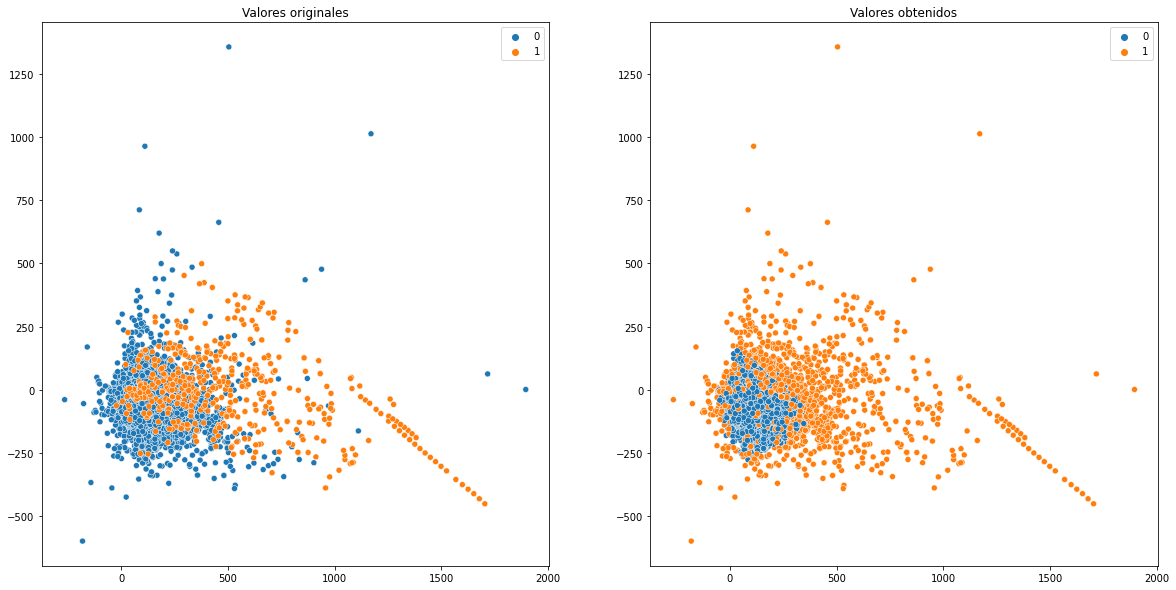

7
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

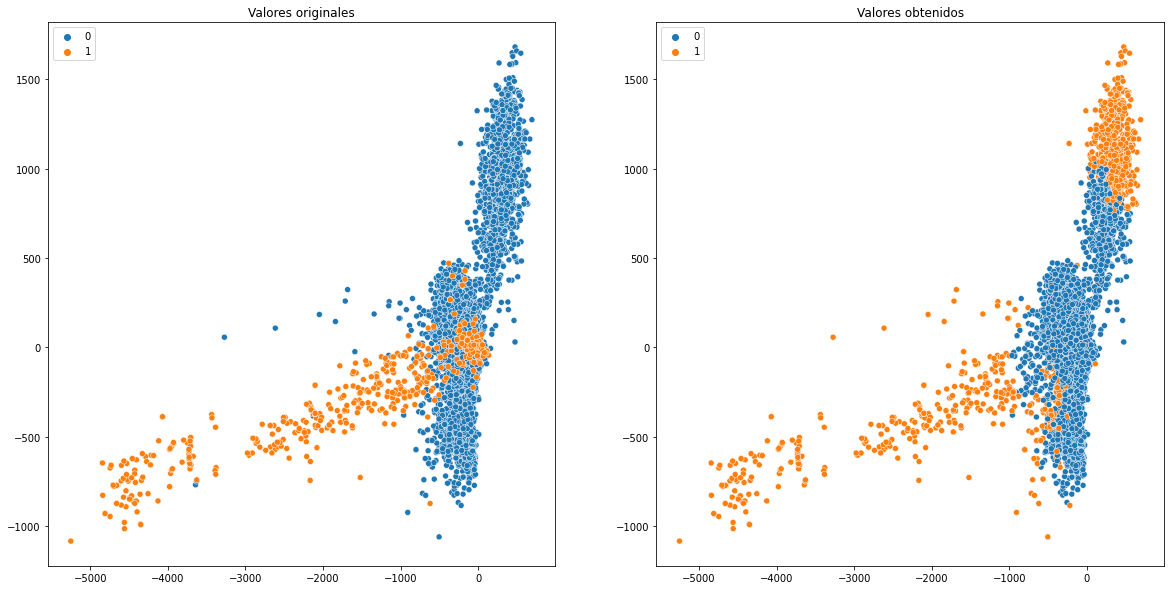

8
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

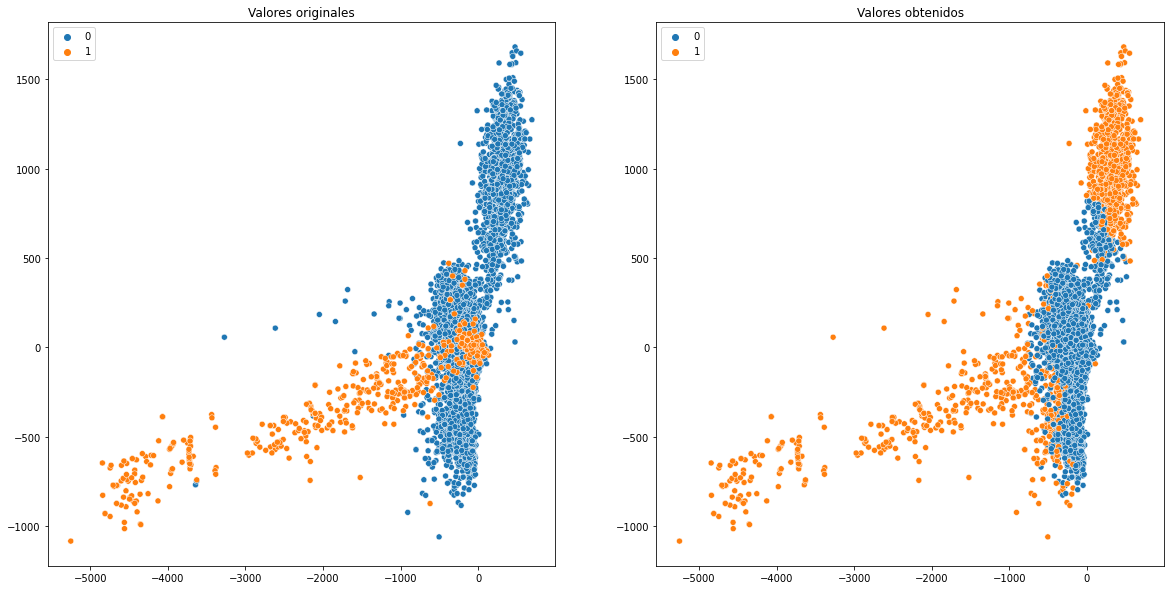

9
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               15872     
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 512)               66048     
                                                                 
 dense_29 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

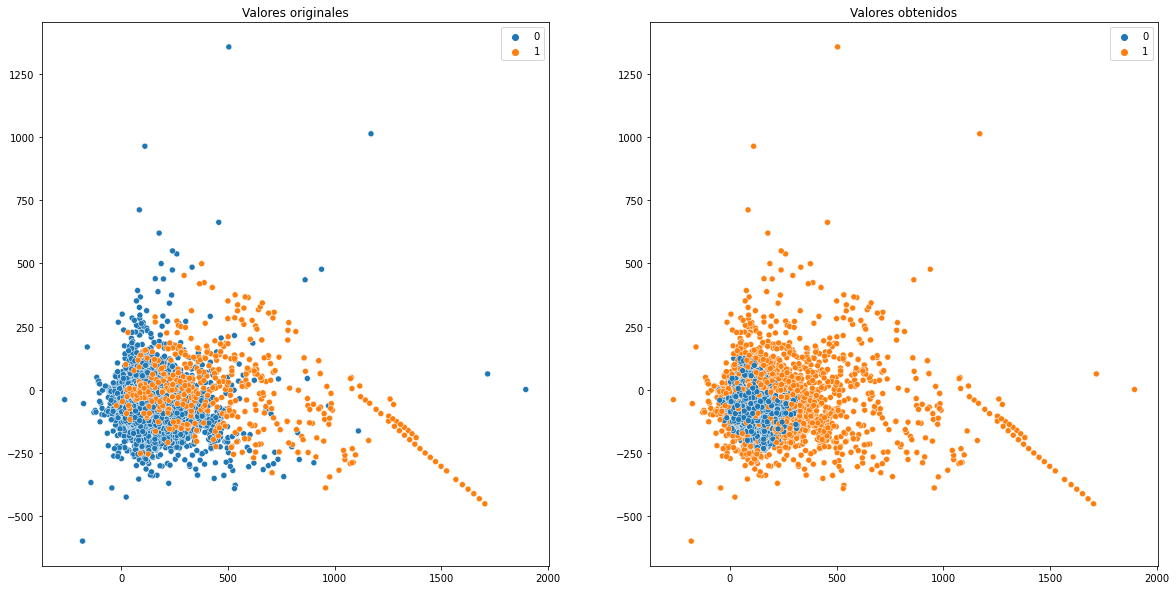

10
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

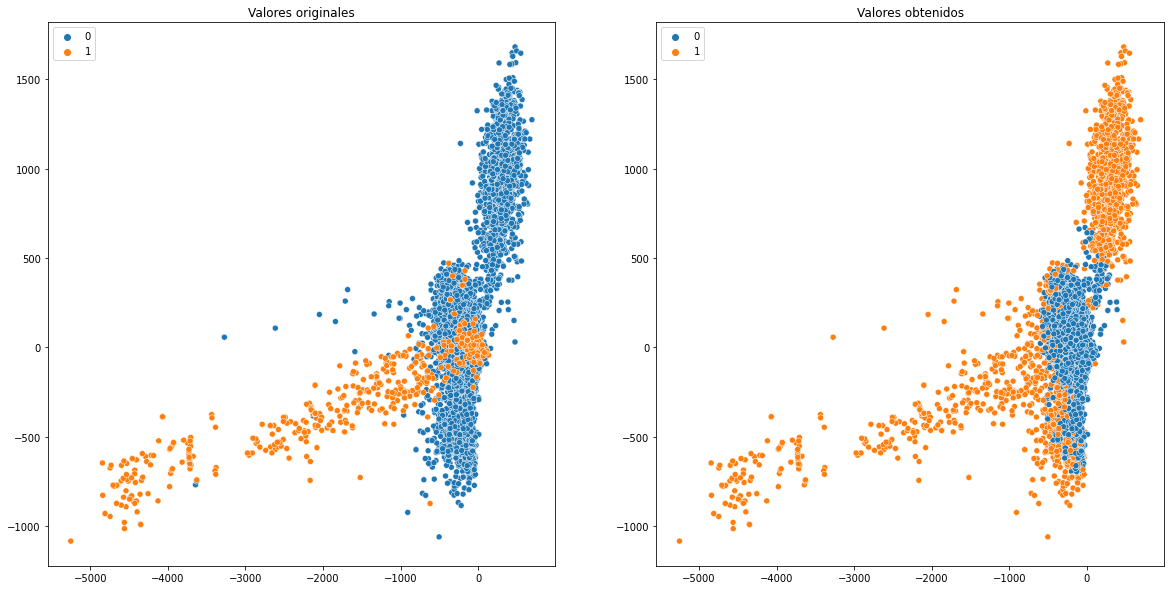

11
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               15872     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_22 (Dense)            (None, 128)               640       
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                                 
 dense_24 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

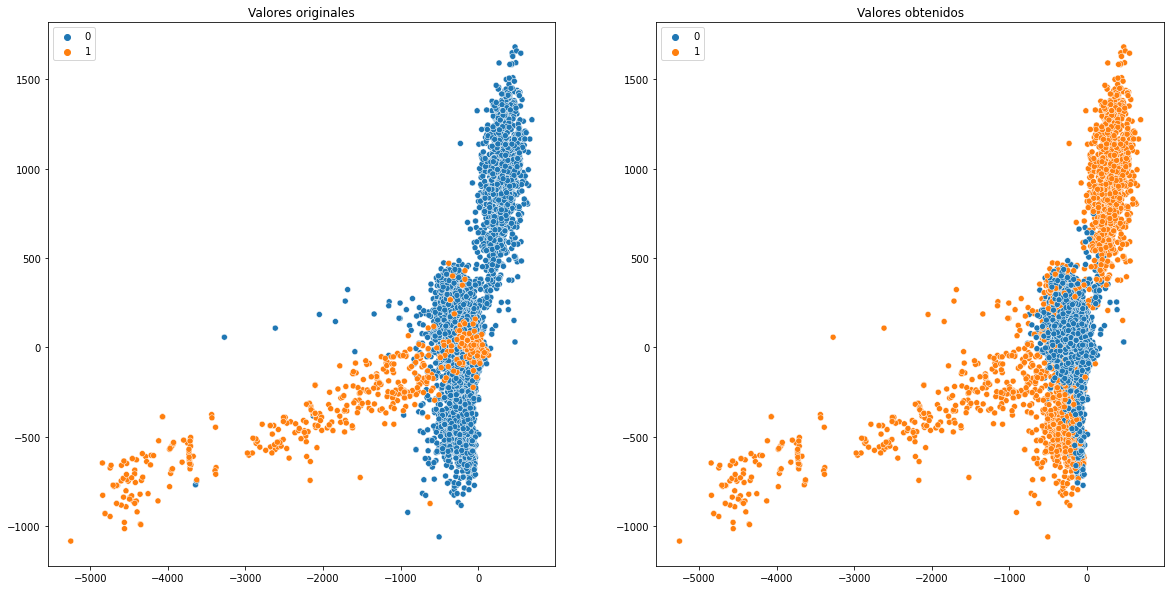

In [16]:
new = []
for n in range(0, 12):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred,dim=2, engine='seaborn')

In [17]:
bueno = obj[0]

x_n, y_n = bueno.predictXY()

plt.probPlot(x_n,y_n)

In [1]:

import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2022-04-21 09:38:19.886080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1
Num GPUs Available:  1


2022-04-21 09:38:24.355519: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-21 09:38:24.356155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-21 09:38:24.402515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:24.402953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.455GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-04-21 09:38:24.403015: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-21 09:38:24.474486: I tensorflow/stream_executor/platform/

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



2022-04-21 09:38:26.378400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-04-21 09:38:26.378545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2022-04-21 09:38:26.378566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2022-04-21 09:38:26.378998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:26.379242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:26.379415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-

In [ ]:
parrafo = ''
for o in obj:
    fila=''
    if o.precision() > 0.7:
        
        if o.recall() > 0.6:
            
            fila+=''+str(x.shape[0])+';'
            if o.reduccion.reductionN == 'pca':
                fila += '{"type":"pca","n_components":'+str(o.reduccion.finalDim)+'};'
                
            elif o.reduccion.reductionN == 'encoder':
                fila += '{"type":"encoder","capas":'+str(o.reduccion.capas)+',"finalDim":'+str(o.reduccion.finalDim)+',"batch_size":'+str(o.reduccion.batch_size)+',"epochs":'+str(o.reduccion.epochs)+'};'
            if o.analisis.modeloN == 'lof':
                fila += '{"type":"lof","n_neighbors":'+str(o.analisis.n_neighbors)+',"contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'isoForest':
                fila += '{"type":"isoForest","contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'som':
                fila += '{"type":"som","sigma":'+str(o.analisis.sigma)+',"learning_rate":'+str(o.analisis.learning_rate)+',"neighborhood_function":'+o.analisis.neighborhood_function+',"outliers_percentage":'+str(o.analisis.outliers_percentage)+',"epochs":'+str(o.analisis.epochs)+'};'
            elif o.analisis.modeloN == 'dbscan':
                fila += '{"type":"som","eps":'+str(o.analisis.eps)+',"min_samples":'+str(o.analisis.min_samples)+'};'
            fila += f'{o.precision()};{o.recall()}'
        else:
            continue
    else:
        break
            
    parrafo += fila
    parrafo += '\n'
        

print(parrafo)

In [ ]:
with open("modelos.csv","a") as f:
    
    f.write(parrafo)

In [ ]:
import pandas as pd

mod = pd.read_csv("modelos.csv",sep=";")
mod.head()

mod.iloc[2,:].reduccion

In [ ]:
pd.